# Solving Optimization Problems

## Import Libraries

In [2]:
import numpy as np
print("Succesfully imported %s -- Version: %s"%(np.__name__,np.__version__))
import scipy
print("Succesfully imported %s -- Version: %s"%(scipy.__name__,scipy.__version__))
import matplotlib.pyplot as plt
print("Succesfully imported %s"%plt.__name__)
import pandas as pd
print("Succesfully imported %s -- Version: %s"%(pd.__name__,pd.__version__))
import sympy as sym 
print("Succesfully imported %s -- Version: %s"%(sym.__name__,sym.__version__))
from scipy import optimize
print("Succesfully imported %s"%optimize.__name__)
from scipy.optimize import fsolve
print("Succesfully imported %s"%fsolve.__name__)
from scipy.signal import find_peaks
print("Succesfully imported %s"%find_peaks.__name__)
from scipy.linalg import orth
print("Succesfully imported %s"%orth.__name__)
from scipy.integrate import odeint
print("Succesfully imported %s"%odeint.__name__)

Succesfully imported numpy -- Version: 1.21.6
Succesfully imported scipy -- Version: 1.7.3
Succesfully imported matplotlib.pyplot
Succesfully imported pandas -- Version: 1.2.4
Succesfully imported sympy -- Version: 1.8
Succesfully imported scipy.optimize
Succesfully imported fsolve
Succesfully imported find_peaks
Succesfully imported orth
Succesfully imported odeint


## Section 1:/ Using Non-Linear Least-Squares on an Analytical Example with Four Parameters 

In [3]:
def model(x, u):
...     return x[0] * (u ** 2 + x[1] * u) / (u ** 2 + x[2] * u + x[3])

def fun(x, u, y):
...     return model(x, u) - y

def jac(x, u, y):
...     J = np.empty((u.size, x.size))
...     den = u ** 2 + x[2] * u + x[3]
...     num = u ** 2 + x[1] * u
...     J[:, 0] = num / den
...     J[:, 1] = x[0] * u / den
...     J[:, 2] = -x[0] * num * u / den ** 2
...     J[:, 3] = -x[0] * num / den ** 2
...     return J

In [4]:
u = np.array([4.0, 2.0, 1.0, 5.0e-1, 2.5e-1, 1.67e-1, 1.25e-1, 1.0e-1,
...               8.33e-2, 7.14e-2, 6.25e-2])
>>> y = np.array([1.957e-1, 1.947e-1, 1.735e-1, 1.6e-1, 8.44e-2, 6.27e-2,
...               4.56e-2, 3.42e-2, 3.23e-2, 2.35e-2, 2.46e-2])
>>> x0 = np.array([2.5, 3.9, 4.15, 3.9])
>>> res = scipy.optimize.least_squares(fun, x0, jac=jac, bounds=(0, 100), args=(u, y), verbose=1)

`ftol` termination condition is satisfied.
Function evaluations 131, initial cost 4.4383e+00, final cost 1.5375e-04, first-order optimality 4.52e-08.


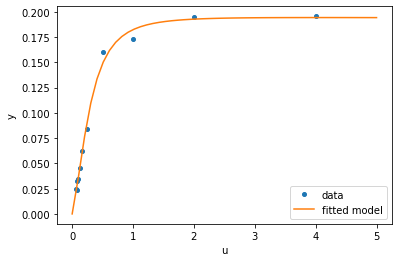

In [5]:
u_test = np.linspace(0, 5)
y_test = model(res.x, u_test)
plt.plot(u, y, 'o', markersize=4, label='data') 
plt.plot(u_test, y_test, label='fitted model')
plt.xlabel("u")
plt.ylabel("y")
plt.legend(loc='lower right')
plt.show()

## Section 2: Non-Linear Least-Squares on Example with Explicit Function in t

In [6]:
from numpy.random import default_rng

rng = default_rng()

def gen_data(t, a, b, c, noise=0., n_outliers=0, seed=None):
     rng = default_rng(seed)

     y = a + b * np.exp(t * c)

     error = noise * rng.standard_normal(t.size)
     outliers = rng.integers(0, t.size, n_outliers)
     error[outliers] *= 10

     return y + error

a = 0.5
b = 2.0
c = -1
t_min = 0
t_max = 10
n_points = 15

t_train = np.linspace(t_min, t_max, n_points)
y_train = gen_data(t_train, a, b, c, noise=0.1, n_outliers=3)

In [7]:
res_lsq = scipy.optimize.least_squares(fun, x0, args=(t_train, y_train),verbose=2)

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         2.7056e+01                                    2.05e+01    
       1              2         6.6216e+00      2.04e+01       7.34e+00       2.33e+00    
       2              4         5.6991e+00      9.23e-01       3.67e+00       5.40e-01    
       3              5         5.6818e+00      1.73e-02       7.34e+00       5.60e-01    
       4              6         5.6772e+00      4.61e-03       7.34e+00       3.41e-03    
       5              9         5.6770e+00      1.38e-04       9.18e-01       2.51e-02    
       6             10         5.6769e+00      1.18e-04       1.84e+00       7.52e-03    
       7             11         5.6768e+00      1.15e-04       3.67e+00       3.64e-02    
       8             12         5.6767e+00      6.69e-05       7.34e+00       9.93e-02    
       9             13         5.6764e+00      3.02e-04       1.84e+00       3.66e-03    

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in exp
  


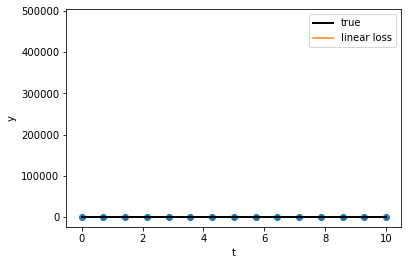

In [8]:
t_test = np.linspace(t_min, t_max, n_points * 10)
y_true = gen_data(t_test, a, b, c)
y_lsq = gen_data(t_test, *res_lsq.x)

plt.plot(t_train, y_train, 'o')
plt.plot(t_test, y_true, 'k', linewidth=2, label='true')
plt.plot(t_test, y_lsq, label='linear loss')
plt.xlabel("t")
plt.ylabel("y")
plt.legend()
plt.show()

## Section 3:/ Using lmfit 
The lmfit package is documented here [lmfit](https://lmfit.github.io/lmfit-py/). 
The example shown here is taken from the page [example of usage of lmfit](https://stackoverflow.com/questions/11278836/fitting-data-to-system-of-odes-using-python-via-scipy-numpy). 

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 16
    # data points      = 10
    # variables        = 2
    chi-square         = 0.00505747
    reduced chi-square = 6.3218e-04
    Akaike info crit   = -71.8947443
    Bayesian info crit = -71.2895741
[[Variables]]
    x10:  5 (fixed)
    x20:  0 (fixed)
    x30:  0 (fixed)
    k0:   0.12183302 +/- 0.00590992 (4.85%) (init = 0.2)
    k1:   0.77583947 +/- 0.02663942 (3.43%) (init = 0.3)
[[Correlations]] (unreported correlations are < 0.100)
    C(k0, k1) = 0.809


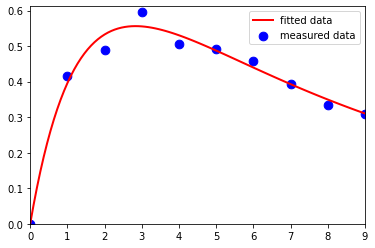

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from lmfit import minimize, Parameters, Parameter, report_fit
from scipy.integrate import odeint


def f(y, t, paras):
    """
    Your system of differential equations
    """

    x1 = y[0]
    x2 = y[1]
    x3 = y[2]

    try:
        k0 = paras['k0'].value
        k1 = paras['k1'].value

    except KeyError:
        k0, k1 = paras
    # the model equations
    f0 = -k0 * x1
    f1 = k0 * x1 - k1 * x2
    f2 = k1 * x2
    return [f0, f1, f2]

def g(t, x0, paras):
    """
    Solution to the ODE x'(t) = f(t,x,k) with initial condition x(0) = x0
    """
    x = odeint(f, x0, t, args=(paras,))
    return x


def residual(paras, t, data):

    """
    compute the residual between actual data and fitted data
    """

    x0 = paras['x10'].value, paras['x20'].value, paras['x30'].value
    model = g(t, x0, paras)

    # you only have data for one of your variables
    x2_model = model[:, 1]
    return (x2_model - data).ravel()


# initial conditions
x10 = 5.
x20 = 0
x30 = 0
y0 = [x10, x20, x30]

# measured data
t_measured = np.linspace(0, 9, 10)
x2_measured = np.array([0.000, 0.416, 0.489, 0.595, 0.506, 0.493, 0.458, 0.394, 0.335, 0.309])

plt.figure()
plt.scatter(t_measured, x2_measured, marker='o', color='b', label='measured data', s=75)

# set parameters including bounds; you can also fix parameters (use vary=False)
params = Parameters()
params.add('x10', value=x10, vary=False)
params.add('x20', value=x20, vary=False)
params.add('x30', value=x30, vary=False)
params.add('k0', value=0.2, min=0.0001, max=2.)
params.add('k1', value=0.3, min=0.0001, max=2.)

# fit model
result = minimize(residual, params, args=(t_measured, x2_measured), method='leastsq')  # leastsq nelder
# check results of the fit
data_fitted = g(np.linspace(0., 9., 100), y0, result.params)

# plot fitted data
plt.plot(np.linspace(0., 9., 100), data_fitted[:, 1], '-', linewidth=2, color='red', label='fitted data')
plt.legend()
plt.xlim([0, max(t_measured)])
plt.ylim([0, 1.1 * max(data_fitted[:, 1])])
# display fitted statistics
report_fit(result)

plt.show()